# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

<ipython-input-1-aa14a0c9ca08>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# download image_predictions.tsv based on the url
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

# store values in a dataframe
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
# import tweepy
# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
# api = tweepy.API(auth)


In [4]:
# import os
# print('total tweets: {}'.format(len(df_image['tweet_id'])))
# counter = 1
# with open('tweet_json.txt', 'a', encoding='utf-8') as file:
#     for tweet_id in df_image['tweet_id']:
#         try:
#             tweet = api.get_status(tweet_id,tweet_mode='extended')
#             json.dump(tweet._json, file)
#             file.write('\n')
            
#             counter += 1
#             if counter % 100 == 0:
#                 print("{} / {}".format(counter, len(df_image['tweet_id'])))
#         except:
#             os.sys.exc_info()[0]

In [5]:
# Parsing 'id','favorite_count' and 'reweet_count' from tweet_json.txt
import json
df_list = []
with open('tweet_json.txt','r', encoding = 'utf-8') as file:
    tweet = file.readline()
    while tweet:
        tweet = json.loads(tweet)
        id = tweet['id']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        df_list.append({'id': id,
                        'favorite_count': int(favorite_count),
                        'retweet_count': int(retweet_count)})
        tweet = file.readline()

# create dataframe and store data into it
df_data = pd.DataFrame(df_list, columns = ['id','favorite_count','retweet_count'])
df_data.head()

,id,favorite_count,retweet_count
0,666020888022790149,2319,435
1,666029285002620928,114,40
2,666033412701032449,102,37
3,666044226329800704,251,118
4,666049248165822465,91,37


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### twitter_archive

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Notes:
1. Type of 'timestamp' should be datetime rather object(string)
2. Type of 'tweet_id'should be string rather int.

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [8]:
reply_tweet = len(twitter_archive.query('in_reply_to_status_id.notnull()', engine = 'python'))
print('There are {} reply tweets'.format(reply_tweet))

There are 78 reply tweets


In [9]:
retweet = len(twitter_archive.query('retweeted_status_id.notnull()', engine = 'python'))
print('There are {} retweets'.format(retweet))

There are 181 retweets


### Notes:
1. Columns of '`in_reply_to_status_id`','`in_reply_to_user_id`', '`retweeted_status_id`', '`retweeted_status_user_id`' and '`retweeted_status_timestamp`' are not about originial tweets, so they shoule be dropped.
2. 'source' column contain unnecessary html residues, only text part should be parsed.
3. doggo, floofer, pupper, puppo all describe one property "dog stage" whcih violates tidiness rule, they should exist in one column.
4. There are 78 reply tweets and 181 retweets which should be dropped.

In [10]:
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

### Notes:
1. we can notice some names in "name" column are strange, such as "a" or "None", those rows need to be dropped later

### More closer look:

### `name`

In [11]:
twitter_archive['name'].value_counts().head(50)

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Tucker     10 
Penny      10 
Lola       10 
Winston    9  
Bo         9  
the        8  
Sadie      8  
Toby       7  
an         7  
Daisy      7  
Buddy      7  
Bailey     7  
Dave       6  
Jax        6  
Jack       6  
Stanley    6  
Oscar      6  
Koda       6  
Rusty      6  
Scout      6  
Milo       6  
Bella      6  
Leo        6  
Oakley     5  
Gus        5  
Sunny      5  
Finn       5  
Sammy      5  
Alfie      5  
Larry      5  
George     5  
Louis      5  
Phil       5  
Bentley    5  
very       5  
Chester    5  
Maggie     4  
Walter     4  
Hank       4  
Jeffrey    4  
Scooter    4  
Luna       4  
Boomer     4  
Brody      4  
Name: name, dtype: int64

In [12]:
error_names = twitter_archive['name'].str.contains('^[a-z]', regex = True)
twitter_archive[error_names]['name'].value_counts()

a               55
the             8 
an              7 
very            5 
one             4 
just            4 
quite           4 
getting         2 
not             2 
actually        2 
mad             2 
officially      1 
space           1 
life            1 
by              1 
unacceptable    1 
old             1 
light           1 
such            1 
this            1 
infuriating     1 
his             1 
my              1 
incredibly      1 
all             1 
Name: name, dtype: int64

In [13]:
print('There are {} inaccurate names in the dataset'.format(len(twitter_archive[error_names])))

There are 109 inaccurate names in the dataset


#### Note:
* From above results, we can see that for true names, they are capitalized, but for others, such as "a", "Bo", etc, they are all lower characters. 
* Based on this principal, we filter out 109 inaacurate names which need to be removed.
* For the "None" name, we should change it to "NaN" to specify don't exist/know situations.

### `expanded_urls`

In [14]:
twitter_archive['expanded_urls'][6]

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

#### Note:
* Simply visually obersve the "expanded_urls", we can find some have doule urls as shown above.

In [15]:
twitter_archive['expanded_urls'].str.contains(',', regex = True).sum()

639

#### Note:
* There are 639 double links present in the "expanded_urls" column.

### `rating_denominator	`

In [16]:
twitter_archive['rating_denominator'].value_counts().sort_index()

0      1   
2      1   
7      1   
10     2333
11     3   
15     1   
16     1   
20     2   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

In [17]:
count = len(twitter_archive.query('rating_denominator != "10"'))
print('There are {} rows whose rating_denominator is not the baseline: 10 '.format(count))

There are 23 rows whose rating_denominator is not the baseline: 10 


In [18]:
mask_columns = ['tweet_id','text', 'rating_numerator','rating_denominator']
non10_denominator = twitter_archive.query('rating_denominator != "10" & in_reply_to_status_id.isnull() & retweeted_status_id.isnull()', engine='python')[mask_columns]
non10_denominator

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


#### Note:
* For fair comparison, rating_denominator should be 10. But we find that there are 23 rows whose rating_denominator is not 10.
* Among 23 tweets, ignoring the replies and retweets, there are 17 tweets with denominators that aren't 10 and they are shown as above. 
* Among 17 tweets, I visually check each tweet and find many of them have multiple dogs in the pictures which can be dropped. But for the rests that have single dog, I manually update each rating in the dataframe "fixed_rating" as shown below.

In [19]:
fixed_rating = pd.read_csv('fixed_rating.csv')
fixed_rating

,tweet_id,original rating,multiple dogs?,new rating
0,"820690176645140481,",84/70,yes,drop
1,"810984652412424192,",24/7,no,"drop, no rating"
2,"758467244762497024,",165/150,yes,drop
3,"740373189193256964,",9/11,no,14/10
4,"731156023742988288,",204/170,yes,drop
5,"722974582966214656,",4/20,yes,drop
6,"716439118184652801,",50/50,no,11/10
7,"713900603437621249,",99/90,yes,drop
8,"710658690886586372,",80/80,yes,drop
9,"709198395643068416,",45/50,yes,drop


#### Note:
* After manually correcting, 4 tweets will be updated later with both new "rating_numerator" and "rating_denominator"

### `rating_numerator	`

In [20]:
twitter_archive['rating_numerator'].value_counts().sort_index()

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

In [21]:
count = len(twitter_archive.query('rating_numerator > 15'))
print('There are {} tweets whose rating_numerator is bigger or equal than 15.'.format(count))

There are 26 tweets whose rating_numerator is bigger or equal than 15.


In [22]:
mask_columns = ['tweet_id','text', 'rating_numerator','rating_denominator']
non10_15_numerator = twitter_archive.query('rating_denominator == 10 & rating_numerator > 15 & in_reply_to_status_id.isnull() & retweeted_status_id.isnull()', engine='python')[mask_columns]
non10_15_numerator

,tweet_id,text,rating_numerator,rating_denominator
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10


### Note:
* We can tell most rating_numerators are in the range [0 , 15], so I will choose 15 as the highest boundary.
* Ignoring reply or reweets, there are 5 tweets whose rating_numerator is far bigger than 15 given its rating_denominator is 10. As shown above, these 5 tweets' texts have decimal numbers or huge numbers. So I will manually correct those decimal numbers (3 tweets) and drop tweets containg huge numbers (2 tweets).

### image_prediction

In [23]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Note:
* tweet_id should be string type.
* There are 2356 tweet_id in the twitter_archive. But here, only 2075 tweet_id are present which says 281 tweets are missing. They should be also included but can classify as "misssing".

In [24]:
df_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
len(df_image.query('p1_dog == False & p2_dog == False & p3_dog == False '))

324

### Note:
* Visually we can notice that in p1, p2 and p3 columns, writings are not consistent (upper case or lower case).
* There are 324 tweets whose dogs can be recognized by the algorithm. 

### `tweet_json`

In [26]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2057 non-null   int64
 1   favorite_count  2057 non-null   int64
 2   retweet_count   2057 non-null   int64
dtypes: int64(3)
memory usage: 48.3 KB


### Note:
* Again, id should be string type

In [27]:
df_data.head(10)

,id,favorite_count,retweet_count
0,666020888022790149,2319,435
1,666029285002620928,114,40
2,666033412701032449,102,37
3,666044226329800704,251,118
4,666049248165822465,91,37
5,666050758794694657,117,50
6,666051853826850816,1057,725
7,666055525042405380,382,202
8,666057090499244032,256,114
9,666058600524156928,100,49


In [28]:
df_data.duplicated().sum()

0

### Quality issues

####  twitter_archive

   1. `"timestamp"` should be datetime type rather object(string) and `"tweet_id"` should be string rather int.

   2. `"source"` column contain unnecessary html residues, only text part should be parsed. They can be simplified as 4 types: 
       * Twitter for iPhone
       * Vine - Make a Scene
       * Twitter Web Client
       * TweetDeck

   3. Drop all reweets (78) and reply tweets (181).
   
   4. Columns of `"in_reply_to_status_id"`, `"in_reply_to_user_id"`, `"retweeted_status_id"`, `"retweeted_status_user_id"', `"retweeted_status_timestamp"` are not about originial tweets, so they shoule be dropped.

   5. 109 inaacurate names are recorded in "names" column need to be dropped. 59 "None" names should be changed to "NaN".

   6. There are 639 double links present in the "expanded_urls" column.

   7. Ignoring retweets or replies tweets, There are 17 tweets with denominators that aren't 10. 4 tweets need to be manually corrected and other 13 tweets will be dropped given multiple dogs present in the original tweets.
       * __tweet id__: 740373189193256964  __original rating__: 9/11   __new rating__: 14/10
       * __tweet id__: 716439118184652801  __original rating__: 50/50  __new rating__: 11/10
       * __tweet id__: 682962037429899265  __original rating__: 7/11   __new rating__: 10/10
       * __tweet id__: 666287406224695296  __original rating__: 1/12   __new rating__: 9/10

   8. Ignoring reply or reweets, there are 5 tweets whose rating_numerator is far bigger than 15 given its rating_denominator is 10. Among these 5 tweets, 3 tweets will be corrects and rest will be dropped.
       * __tweet id__: 786709082849828864  __original rating__: 9.75/10   __new rating__: 10/10
       * __tweet id__: 778027034220126208  __original rating__: 11.27/10  __new rating__: 11/10
       * __tweet id__: 680494726643068929  __original rating__: 11.26/10  __new rating__: 11/10

    
#### image_prediction
   1. `"tweet_id"` should be string type
   1. `"p1"`, `"p2"` and `"p3"` columns, writings are not consistent (upper case or lower case).
    
   2. There are 324 tweets whose dogs can be recognized by the algorithm.
    
#### tweet_json
   1. `"id"` should be string type

### Tidiness issues

   1. doggo, floofer, pupper, puppo all describe one property "dog stage" whcih violates tidiness rule, they should exist in one column.

   2. Columns with numerical data are located to the far right of the tweet_archive table, which makes it difficult to readily see the data that will be used for analyses.
   
   3. The dog breed prediction with the highest confidence level can be combined with the tweet_archive table to make the information more comprehensive
   
   3. json dataframe should be combined with first table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
df_image_clean = df_image.copy()
df_data_clean = df_data.copy()

### twitter_archive

### Issue #1: data type inaccurancy

#### Define: 
Change "timestamp" to datetime type, "tweet_id" to string type, "id" to string type

#### Code

In [30]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
df_data_clean['id'] = df_data_clean['id'].astype(str)

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [32]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2057 non-null   object
 1   favorite_count  2057 non-null   int64 
 2   retweet_count   2057 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 48.3+ KB


### Issue #2: reply tweets and retweets are included in the original tweet table.

#### Define 
Drop rows whose "in_reply_to_status_id", "retweeted_status_user_id" isn't null.

#### Code

In [33]:
twitter_archive_clean = twitter_archive_clean.query('in_reply_to_status_id.isnull()', engine = 'python')
twitter_archive_clean = twitter_archive_clean.query('retweeted_status_user_id.isnull()', engine = 'python')

In [34]:
# reset row index after dropping
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)

#### Test

In [35]:
reply_tweet = len(twitter_archive_clean.query('in_reply_to_status_id.notnull()', engine = 'python'))
retweet = len(twitter_archive_clean.query('retweeted_status_user_id.notnull()', engine = 'python'))
print('There are {} reply tweets'.format(reply_tweet))
print('There are {} retweets'.format(retweet))

There are 0 reply tweets
There are 0 retweets


### Issue #3: information about reply tweets and retweets are present in the original tweet table

#### Define 
Drop "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id"',"retweeted_status_timestamp" columns.


#### Code

In [36]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_id',
                                'retweeted_status_user_id',
                                'retweeted_status_timestamp'], axis = 1)

#### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #4: "source" column contain unnecessary html residues, only text part should be parsed.

#### Define 
Extract string between \<a href> and \</a> as source column

#### Code

In [38]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [39]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<\D+>(\D+)</a>$')

#### Test

In [40]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

### Issue #5: Inaacurate names are recorded in "names" column.

#### Define 
change 109 inaacurate names and  59 "None" names into "NaN" in the "name" column

#### Code

In [41]:
twitter_archive_clean['name'].isnull().sum()

0

In [42]:
error_names = twitter_archive_clean['name'].str.contains('^[a-z]', regex = True)
twitter_archive_clean[error_names]['name'].value_counts()

a               55
the             8 
an              6 
very            4 
one             4 
just            3 
quite           3 
getting         2 
not             2 
actually        2 
officially      1 
life            1 
by              1 
unacceptable    1 
old             1 
space           1 
light           1 
mad             1 
this            1 
such            1 
infuriating     1 
his             1 
my              1 
incredibly      1 
all             1 
Name: name, dtype: int64

In [43]:
import numpy as np
twitter_archive_clean.loc[error_names,'name'] = 'None'

#### Test

In [44]:
twitter_archive_clean['name'].str.contains('^[a-z]', regex = True).sum()

0

### Issue #6: There are less than 639 double links present in the "expanded_urls" column.

#### Define 
extract single link and put into "expanded_urls" column

#### Code

In [45]:
twitter_archive_clean['expanded_urls'].str.contains(',', regex = True).sum()

505

In [46]:
for i in range(len(twitter_archive_clean)):
    t_id = twitter_archive_clean['tweet_id'][i]
    url = 'https://twitter.com/dog_rates/status/{}/photo/1'.format(t_id)
    twitter_archive_clean['expanded_urls'].replace(twitter_archive_clean['expanded_urls'][i],url,inplace=True)

#### Test

In [47]:
twitter_archive_clean['expanded_urls'].str.contains(',', regex = True).sum()

0

In [48]:
twitter_archive_clean['expanded_urls'].head(20)

0     https://twitter.com/dog_rates/status/892420643555336193/photo/1
1     https://twitter.com/dog_rates/status/892177421306343426/photo/1
2     https://twitter.com/dog_rates/status/891815181378084864/photo/1
3     https://twitter.com/dog_rates/status/891689557279858688/photo/1
4     https://twitter.com/dog_rates/status/891327558926688256/photo/1
5     https://twitter.com/dog_rates/status/891087950875897856/photo/1
6     https://twitter.com/dog_rates/status/890971913173991426/photo/1
7     https://twitter.com/dog_rates/status/890729181411237888/photo/1
8     https://twitter.com/dog_rates/status/890609185150312448/photo/1
9     https://twitter.com/dog_rates/status/890240255349198849/photo/1
10    https://twitter.com/dog_rates/status/890006608113172480/photo/1
11    https://twitter.com/dog_rates/status/889880896479866881/photo/1
12    https://twitter.com/dog_rates/status/889665388333682689/photo/1
13    https://twitter.com/dog_rates/status/889638837579907072/photo/1
14    https://twitte

### Issue #7: rating_denominator should be 10

#### Define 
Ignoring retweets or replies tweets, There are 17 tweets with denominators that aren't 10. 4 tweets need to be manually corrected and other 13 tweets will be dropped given multiple dogs present in the original tweets.

#### Code

In [49]:
# number of tweets whose rating_denominator isn't 10
mask_columns = ['tweet_id','text', 'rating_numerator','rating_denominator']
non10_denominator = twitter_archive_clean.query('rating_denominator != "10"', engine='python')[mask_columns]
len(non10_denominator)

17

In [50]:
twitter_archive_clean.tweet_id == 740373189193256964

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [51]:
# manually fixing rating of four tweets
row = twitter_archive_clean.tweet_id == "740373189193256964"
twitter_archive_clean.loc[row, 'rating_numerator'] = 14
twitter_archive_clean.loc[row, 'rating_denominator'] = 10

In [52]:
row = twitter_archive_clean.tweet_id == "716439118184652801"
twitter_archive_clean.loc[row, 'rating_numerator'] = 11
twitter_archive_clean.loc[row, 'rating_denominator'] = 10

In [53]:
row = twitter_archive_clean.tweet_id == "682962037429899265"
twitter_archive_clean.loc[row, 'rating_numerator'] = 10
twitter_archive_clean.loc[row, 'rating_denominator'] = 10

In [54]:
row = twitter_archive_clean.tweet_id == "666287406224695296"
twitter_archive_clean.loc[row, 'rating_numerator'] = 9
twitter_archive_clean.loc[row, 'rating_denominator'] = 10

In [55]:
# drop rest 13 tweets whose rating_denominator isn't 10 and there are multiple dogs present in their images
drop_rows = twitter_archive_clean.query('rating_denominator != 10')
twitter_archive_clean = twitter_archive_clean.drop(drop_rows.index, axis = 0)

In [56]:
# reset row index after dropping
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)

#### Test

In [57]:
twitter_archive_clean[(twitter_archive_clean.tweet_id == "740373189193256964") | 
                      (twitter_archive_clean.tweet_id == "716439118184652801") | 
                      (twitter_archive_clean.tweet_id == "682962037429899265") |
                      (twitter_archive_clean.tweet_id == "666287406224695296")]
                     

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
850,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",https://twitter.com/dog_rates/status/740373189193256964/photo/1,14,10,None,None,None,None,None
980,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None
1415,682962037429899265,2016-01-01 16:30:13+00:00,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,None,None,None,None
2063,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,None,None,None,None,None


In [58]:
len(twitter_archive_clean.query('rating_denominator != "10"'))

0

### Issue #8: rating_numerator

#### Define 
Ignoring reply or reweets, there are 5 tweets whose rating_numerator is far bigger than 15 given its rating_denominator is 10. Among these 5 tweets, 3 tweets will be corrects and rest will be dropped.

#### Code

In [59]:
twitter_archive_clean.query('rating_numerator >= 15')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
526,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
584,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
767,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1463,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None
1808,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [60]:
# manually fixing rating of three tweets
row = twitter_archive_clean.tweet_id == "786709082849828864"
twitter_archive_clean.loc[row, 'rating_numerator'] = 10

In [61]:
row = twitter_archive_clean.tweet_id == "778027034220126208"
twitter_archive_clean.loc[row, 'rating_numerator'] = 10

In [62]:
row = twitter_archive_clean.tweet_id == "680494726643068929"
twitter_archive_clean.loc[row, 'rating_numerator'] = 10

In [63]:
# drop rest 2 tweets whose rating_numerator is bigger than 15
drop_rows = twitter_archive_clean.query('rating_numerator >= 15')
twitter_archive_clean = twitter_archive_clean.drop(drop_rows.index, axis = 0)
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)

#### Test

In [64]:
twitter_archive_clean.query('rating_numerator >= 15')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### image_prediction

### Issue #1: data type inaccurancy

#### Define 
change "tweet_id" into string type

#### Code

In [65]:
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)

#### Test

In [66]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #2: "p1", "p2" and "p3" columns, writings are not consistent (upper case or lower case).

#### Define 
change names in p1, p2, p3 to lowercase


#### Code

In [67]:
df_image_clean = df_image.copy()
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [68]:
df_image_clean.p1 = df_image_clean.p1.str.lower()
df_image_clean.p2 = df_image_clean.p2.str.lower()
df_image_clean.p3 = df_image_clean.p3.str.lower()

#### Test

In [69]:
df_image_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### jason_data

### Issue #1: Inaccurate "id" type

#### Define 
"id" should be string type

#### Code

In [70]:
df_data_clean.id = df_data_clean.id.astype(str)

#### Test

In [71]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2057 non-null   object
 1   favorite_count  2057 non-null   int64 
 2   retweet_count   2057 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 48.3+ KB


### Tidiness issues

### Issue #1: doggo, floofer, pupper, puppo all describe one property "dog stage" whcih violates tidiness rule, they should exist in one column.

#### Define 
* Melt the 4 columns with the dog stages
* Manually check tweet with multiple stage description and update the correct type

#### Code

In [72]:
# Defining a function aimed at creating a column with all stage

def dog_Stage(row):
    # Defining a list to store the data
    stage = []
    # Setting the conditional
    if row['doggo'] == 'doggo':
        # Adding the entry to the list if it satisfies the condition
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    if len(stage) < 1: 
        row['stage'] = 'None'
    else: 
        row['stage'] = ' and '.join(stage)
    return row

In [73]:
# Applying the "dog-stage" function to each record
twitter_archive_clean = twitter_archive_clean.apply(dog_Stage, axis=1)

In [74]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,None,None,None,None,None


In [75]:
# drop 'doggo','floofer','pupper' and 'puppo' columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   object             
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                2082 non-null   object             
 8   stage               2082 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 146.5+ KB


In [77]:
twitter_archive_clean['stage'].value_counts()

None                 1746
pupper               221 
doggo                72  
puppo                23  
doggo and pupper     9   
floofer              9   
doggo and puppo      1   
doggo and floofer    1   
Name: stage, dtype: int64

In [78]:
twitter_archive_clean.query('stage == "doggo and pupper"')['expanded_urls']

357    https://twitter.com/dog_rates/status/817777686764523521/photo/1
414    https://twitter.com/dog_rates/status/808106460588765185/photo/1
444    https://twitter.com/dog_rates/status/801115127852503040/photo/1
534    https://twitter.com/dog_rates/status/785639753186217984/photo/1
560    https://twitter.com/dog_rates/status/781308096455073793/photo/1
687    https://twitter.com/dog_rates/status/759793422261743616/photo/1
745    https://twitter.com/dog_rates/status/751583847268179968/photo/1
844    https://twitter.com/dog_rates/status/741067306818797568/photo/1
893    https://twitter.com/dog_rates/status/733109485275860992/photo/1
Name: expanded_urls, dtype: object

In [79]:
twitter_archive_clean.query('stage == "doggo and floofer"')['expanded_urls']

161    https://twitter.com/dog_rates/status/854010172552949760/photo/1
Name: expanded_urls, dtype: object

In [80]:
twitter_archive_clean.query('stage == "doggo and puppo"')['expanded_urls']

154    https://twitter.com/dog_rates/status/855851453814013952/photo/1
Name: expanded_urls, dtype: object

__Manually check above 11 tweets and update each stage type__
    
    * 357 pupper
    * 414 correct, doggo and pupper
    * 444 doggo
    * 534 doggo
    * 560 correct, doggo and pupper
    * 687 correct, doggo and pupper
    * 745 doggo
    * 844 correct, doggo and pupper
    * 893 correct, doggo and pupper
    * 161 floofer
    * 154 puppo

In [81]:
# manually change "stage" to the right description
twitter_archive_clean.loc[twitter_archive_clean.index == 357, 'stage'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.index == 444, 'stage'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.index == 534, 'stage'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.index == 745, 'stage'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.index == 161, 'stage'] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean.index == 154, 'stage'] = 'puppo'

#### Test

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2082 non-null   object             
 1   timestamp           2082 non-null   datetime64[ns, UTC]
 2   source              2082 non-null   object             
 3   text                2082 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2082 non-null   int64              
 6   rating_denominator  2082 non-null   int64              
 7   name                2082 non-null   object             
 8   stage               2082 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 146.5+ KB


### Issue #2: The dog breed prediction with the highest confidence level can be combined with the tweet_archive table to make the information more comprehensive

#### Define 
* create new columns called "breed" and "confidence". Check each "p1_dog", "p2_dog", "p3_dog" column and choose the column which is True and put its predicted dog breed into "breed" column. Similarly, put its corresponding confidence into "confidence" column.
* For the tweet which can be predicted by the algorithm, fill "None" and 0 to the "breed" and "confidence" column, respectively.
* Then merge twitter_archive_clean table with df_image_clean table based on "tweet_id".

#### Code

In [83]:
# define "breed" function
def breed(c):
    if c['p1_dog'] == True: return c['p1']
    elif c['p2_dog'] == True: return c['p2']
    elif c['p3_dog'] == True: return c['p3']
    else: return "None"

df_image_clean['breed'] = df_image_clean.apply(breed, axis = 1)

In [84]:
# define "confidence" function
def confidence(c):
    if c['p1_dog'] == True: return c['p1_conf']
    elif c['p2_dog'] == True: return c['p2_conf']
    elif c['p3_dog'] == True: return c['p3_conf']
    else: return 0

df_image_clean['confidence'] = df_image_clean.apply(confidence, axis = 1)

In [85]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher,0.560311


In [86]:
df_image_clean.tweet_id = df_image_clean.tweet_id.astype('str')

In [87]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  breed       2075 non-null   object 
 13  confidence  2075 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


In [88]:
# Now join two tables
join_col = ['tweet_id','breed','confidence']
twitter_archive_clean = pd.merge(twitter_archive_clean, df_image_clean[join_col], on = 'tweet_id', how = 'inner')

In [89]:
# drop "breed" and "confidence" columns in df_image_clean table
df_image_clean = df_image_clean.drop(['breed','confidence'], axis = 1)

#### Test

In [90]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,None,basset,0.555712


### Issue #3: json dataframe should be combined with first table to make information more comprehensive

#### Define 
join jsnn "favoriate" and "retweet_count" with the tweet_archive_clean table

#### Code

In [91]:
df_data_clean.head()

,id,favorite_count,retweet_count
0,666020888022790149,2319,435
1,666029285002620928,114,40
2,666033412701032449,102,37
3,666044226329800704,251,118
4,666049248165822465,91,37


In [92]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2057 non-null   object
 1   favorite_count  2057 non-null   int64 
 2   retweet_count   2057 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 48.3+ KB


In [93]:
# before joining, change name from "id" to "tweet_id"
df_data_clean = df_data_clean.rename(columns = {'id': 'tweet_id'})

In [94]:
df_data_clean.head()

,tweet_id,favorite_count,retweet_count
0,666020888022790149,2319,435
1,666029285002620928,114,40
2,666033412701032449,102,37
3,666044226329800704,251,118
4,666049248165822465,91,37


In [95]:
twitter_archive_clean = pd.merge(twitter_archive_clean, df_data_clean, on = 'tweet_id', how = 'left')

In [96]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1955
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1956 non-null   object             
 1   timestamp           1956 non-null   datetime64[ns, UTC]
 2   source              1956 non-null   object             
 3   text                1956 non-null   object             
 4   expanded_urls       1956 non-null   object             
 5   rating_numerator    1956 non-null   int64              
 6   rating_denominator  1956 non-null   int64              
 7   name                1956 non-null   object             
 8   stage               1956 non-null   object             
 9   breed               1956 non-null   object             
 10  confidence          1956 non-null   float64            
 11  favorite_count      1948 non-null   float64            
 12  retweet_count       1948 non-null 

### Note:

* After joining, types of "favorite_count" and "retweet_count" become float, we should change them back to the int
* Also, there are some missing  values in these two columns which need to be removed


In [97]:
twitter_archive_clean['favorite_count'] = pd.to_numeric(twitter_archive_clean['favorite_count'], errors='coerce').astype('Int64')
twitter_archive_clean['retweet_count'] = pd.to_numeric(twitter_archive_clean['retweet_count'], errors='coerce').astype('Int64')

#### Test

In [98]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1955
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1956 non-null   object             
 1   timestamp           1956 non-null   datetime64[ns, UTC]
 2   source              1956 non-null   object             
 3   text                1956 non-null   object             
 4   expanded_urls       1956 non-null   object             
 5   rating_numerator    1956 non-null   int64              
 6   rating_denominator  1956 non-null   int64              
 7   name                1956 non-null   object             
 8   stage               1956 non-null   object             
 9   breed               1956 non-null   object             
 10  confidence          1956 non-null   float64            
 11  favorite_count      1948 non-null   Int64              
 12  retweet_count       1948 non-null 

In [99]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,confidence,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,0.000000,34449,7162
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,chihuahua,0.323581,29876,5384
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,chihuahua,0.716012,22492,3551
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,labrador_retriever,0.168086,37629,7370
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,None,basset,0.555712,35951,7919


### Issue #4: Adjust column positions in twitter_archive_clean table to make reading more easily

#### Define 
Put number columns such as "rating", "favoriate_count", "retweet_count" before text columns

#### Code

In [100]:
col_list = list(twitter_archive_clean)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'stage', 'breed', 'confidence', 'favorite_count', 'retweet_count']


In [101]:
# adjust new positions
new_pos = ['tweet_id', 'timestamp','rating_numerator', 'rating_denominator','favorite_count', 
           'retweet_count','name', 'stage', 'breed', 'confidence',
          'source', 'text', 'expanded_urls']
twitter_archive_clean = twitter_archive_clean[new_pos]

#### Test

In [102]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,favorite_count,retweet_count,name,stage,breed,confidence,source,text,expanded_urls
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,34449,7162,Phineas,None,None,0.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,29876,5384,Tilly,None,chihuahua,0.323581,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [103]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index =False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [194]:
we_rate_dogs = twitter_archive_clean.copy()
we_rate_dogs.head(1)

,tweet_id,timestamp,rating_numerator,rating_denominator,favorite_count,retweet_count,name,stage,breed,confidence,source,text,expanded_urls
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,34449,7162,Phineas,None,None,0.0,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1


### 1. Statistics

In [206]:
we_rate_dogs[['rating_numerator','rating_denominator','favorite_count','retweet_count']].describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1956.000000,1956.0,1948.000000,1948.000000
mean,10.538344,10.0,7929.744353,2314.364476
std,2.172618,0.0,11674.833950,4142.818756
min,0.000000,10.0,67.000000,11.000000
25%,10.000000,10.0,1661.500000,511.750000
50%,11.000000,10.0,3561.500000,1111.500000
75%,12.000000,10.0,9903.500000,2637.750000
max,14.000000,10.0,147592.000000,72425.000000


### 2. Distribution of rating (numerator)

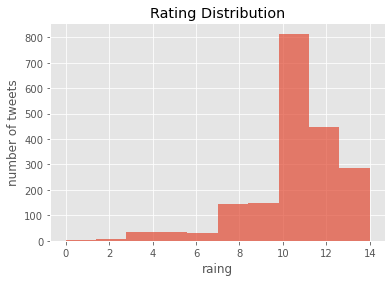

In [197]:
plt.hist(we_rate_dogs['rating_numerator'], alpha = 0.7)
plt.title('Rating Distribution')
plt.xlabel('raing')
plt.ylabel('number of tweets');

In [200]:
number = sum(we_rate_dogs['rating_numerator'] >= 10)
percentage = sum(we_rate_dogs['rating_numerator'] >= 10) / len(we_rate_dogs['rating_numerator'])
print('There are {} tweets with ratings bigger than 10'.format(number))
print('The percentage of tweets with ratings bigger than 10 is {}%'.format(int(percentage * 100)))

There are 1547 tweets with ratings bigger than 10
The percentage of tweets with ratings bigger than 10 is 79%


### Note:
* From rating histogram, we can clearly see most ratings are bigger than 10. The descriptive statistics also tells us that 75% of ratings are between 10 and 14 inclusive.
* More specifically, there are 1547 tweets with ratings bigger than 10 and its percentage is 79%.

### 3. Which tweet is the most favorited (and also most retweeted)? 

In [219]:
we_rate_dogs.query('favorite_count == 147592', engine = 'python')

,tweet_id,timestamp,rating_numerator,rating_denominator,favorite_count,retweet_count,name,stage,breed,confidence,source,text,expanded_urls
765,744234799360020481,2016-06-18 18:26:18+00:00,13,10,147592,72425,None,doggo,labrador_retriever,0.825333,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/photo/1


![Image of favorite tweet](favorite_image.jpg)

### 4. Which is the distribution of stage?

In [220]:
stage = we_rate_dogs['stage'].value_counts()

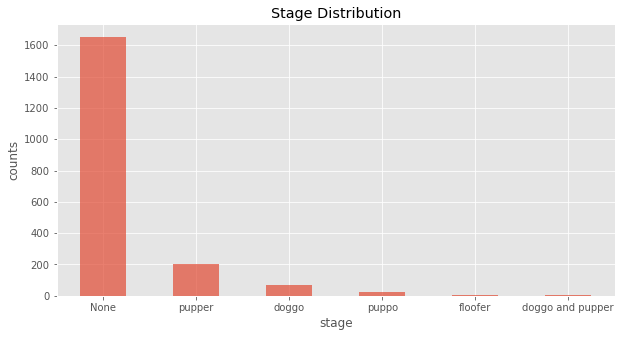

In [221]:
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
stage.plot(kind = 'bar', alpha = 0.7)
plt.title('Stage Distribution')
plt.xlabel('stage')
plt.ylabel('counts')
plt.xticks(rotation=0);

In [222]:
count = len(we_rate_dogs.query('stage != "None"'))
percentage = count / len(we_rate_dogs['stage']) * 100
print('There are {} tweets of which dog stages can be identified'.format(count))
print('The percentage is {}%'.format(int(percentage)))

There are 303 tweets of which dog stages can be identified
The percentage is 15%


### Note:
* It is obvious only a small portion of tweets (15%) can be identified dog stages.

### 5.Top 10 dog breeds among all tweets

In [223]:
breed_10 = we_rate_dogs.query('breed != "None"')['breed'].value_counts().head(10)
breed_10

golden_retriever      154
labrador_retriever    103
pembroke              94 
chihuahua             90 
pug                   62 
toy_poodle            50 
chow                  47 
samoyed               42 
pomeranian            41 
malamute              33 
Name: breed, dtype: int64

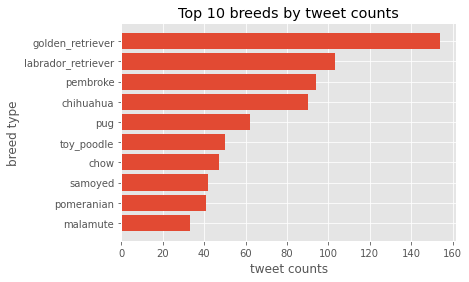

In [234]:
plt.style.use('ggplot')
plt.barh(breed_10.index, breed_10)
plt.title('Top 10 breeds by tweet counts')
plt.xlabel('tweet counts')
plt.ylabel('breed type')
plt.gca().invert_yaxis();

### Note:
* Among tweets whose dogs breed can be identified by the algorithm, Top 10 breeds are shownn as above
* The most common breed is "golden_retriever" which has 154 counts.

### 6. Top 10 breeds with the most favorite counts

In [225]:
breed_10_fav = we_rate_dogs.query('breed != "None"').groupby(['breed'])['favorite_count'].sum()
breed_10_fav = breed_10_fav.sort_values(ascending = False).head(10)
breed_10_fav

breed
golden_retriever      1710974
labrador_retriever    1041230
pembroke              922938 
chihuahua             680624 
french_bulldog        536123 
samoyed               491382 
chow                  394552 
cocker_spaniel        359374 
pug                   332072 
malamute              310720 
Name: favorite_count, dtype: Int64

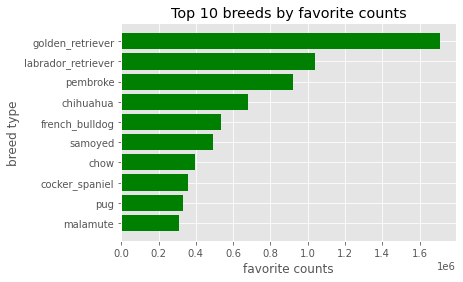

In [237]:
plt.barh(breed_10_fav.index, breed_10_fav, color = 'g')
plt.title('Top 10 breeds by favorite counts')
plt.xlabel('favorite counts')
plt.ylabel('breed type')
plt.gca().invert_yaxis();

### Note:
* From this bar chart, we know it is sitll golden_retriever has the most total favorite counts, up to 1710974.
* This result matches well with top 10 breeds by tweet counts which makes a lot sense.

### 7. Ratings for top 10 breeds (based on favorite counts)

In [243]:
breed_list = breed_10_fav.index.tolist()
breed_list

['golden_retriever',
 'labrador_retriever',
 'pembroke',
 'chihuahua',
 'french_bulldog',
 'samoyed',
 'chow',
 'cocker_spaniel',
 'pug',
 'malamute']

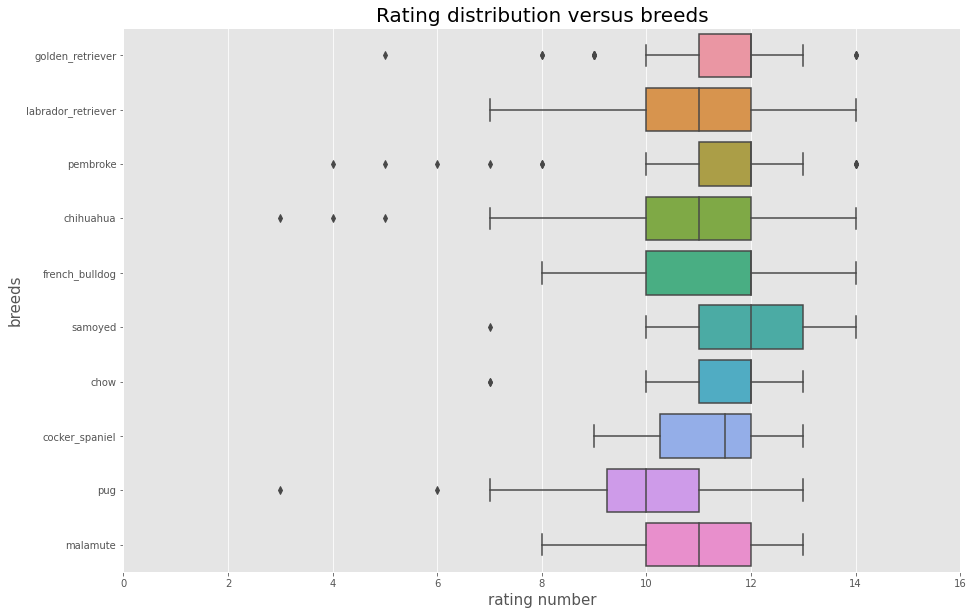

In [276]:
plt.figure(figsize = (15, 10))
bplot = sns.boxplot(y = 'breed', x = 'rating_numerator',
                    data = we_rate_dogs, 
                    orient = 'h',
                    order = breed_list)
plt.xlim(0, 16)

plt.title('Rating distribution versus breeds', fontsize = 20)
plt.xlabel('rating number', fontsize = 15)
plt.ylabel('breeds', fontsize = 15);

### Note:
* From this boxplot, we can see the most ratings for the top 10 breeds range between 10 and 12. Some breeds have outliers.

### 8. Multivariate visualization: retweet counts versus favorite counts over ratings



In [290]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1955
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1956 non-null   object             
 1   timestamp           1956 non-null   datetime64[ns, UTC]
 2   rating_numerator    1956 non-null   int64              
 3   rating_denominator  1956 non-null   int64              
 4   favorite_count      1948 non-null   Int64              
 5   retweet_count       1948 non-null   Int64              
 6   name                1956 non-null   object             
 7   stage               1956 non-null   object             
 8   breed               1956 non-null   object             
 9   confidence          1956 non-null   float64            
 10  source              1956 non-null   object             
 11  text                1956 non-null   object             
 12  expanded_urls       1956 non-null 

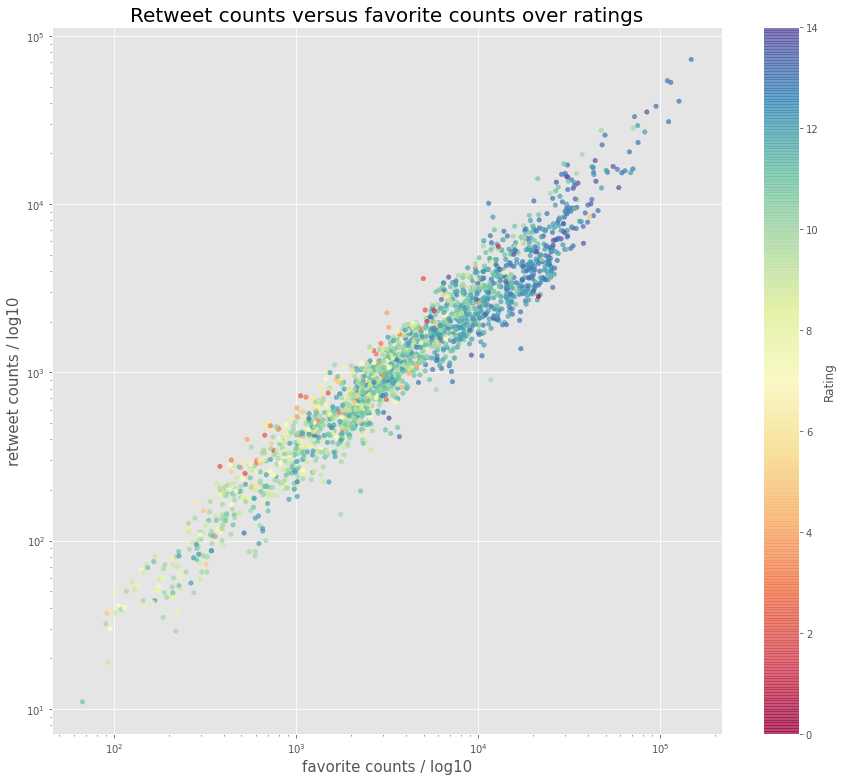

In [305]:
from matplotlib import cm
plt.figure(figsize = (15,13))
cmap = cm.get_cmap('Spectral')
color = we_rate_dogs[we_rate_dogs['rating_numerator'].notnull() & we_rate_dogs['favorite_count'].notnull()]['rating_numerator']
x = we_rate_dogs[we_rate_dogs['favorite_count'].notnull()]['favorite_count']
y = we_rate_dogs[we_rate_dogs['retweet_count'].notnull()]['retweet_count']
plt.xscale('log')
plt.yscale('log')
plt.scatter(x, y, c = color, cmap = cmap, s = 20, alpha = 0.7)

# title and labels
plt.title('Retweet counts versus favorite counts over ratings', fontsize = 20)
plt.xlabel('favorite counts / log10', fontsize = 15)
plt.ylabel('retweet counts / log10', fontsize = 15)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating');

### Note:
* As expected, relationship between retweet counts and favorite counts are positively correlated. It says if a users likes a tweet, it is more likely that the user will retweet it.
* Also, the popular tweet will get a higher rating (dark purple dots).

### 8. Retweet counts versus time the tweet was posted

In [307]:
df_hour = we_rate_dogs.copy()

In [321]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1955
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1956 non-null   object             
 1   timestamp           1956 non-null   datetime64[ns, UTC]
 2   rating_numerator    1956 non-null   int64              
 3   rating_denominator  1956 non-null   int64              
 4   favorite_count      1948 non-null   Int64              
 5   retweet_count       1948 non-null   Int64              
 6   name                1956 non-null   object             
 7   stage               1956 non-null   object             
 8   breed               1956 non-null   object             
 9   confidence          1956 non-null   float64            
 10  source              1956 non-null   object             
 11  text                1956 non-null   object             
 12  expanded_urls       1956 non-null 

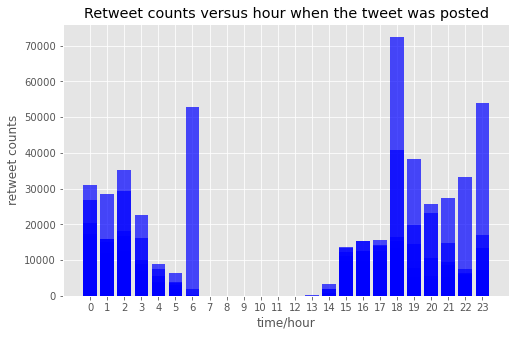

In [341]:
plt.figure(figsize = (8,5))
df_hour['hour'] = df_hour.timestamp.apply(lambda x: x.hour)
row = df_hour[df_hour['retweet_count'].notnull()]
plt.bar(row['hour'], row['retweet_count'], color = 'b', alpha = 0.7)
plt.title('Retweet counts versus hour when the tweet was posted')
plt.xlabel('time/hour')
plt.ylabel('retweet counts')
plt.xticks(np.arange(0, 24, step=1));

### Note:
* From this barplot, we know that if the tweet was posted on afternoon 6 pm, it has the highest retweet counts.However, if it was posted on the morning between 7-12 am, people barely retweet it. It is reasonable because people usually don't have time to check tweets in the morning.